In [1]:
import numpy as np
data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
print(data.shape)
print(target.shape)

(285, 2500)
(285,)


In [3]:
import collections
print(collections.Counter(target))

Counter({np.int32(1): 113, np.int32(2): 91, np.int32(0): 81})


In [4]:
from sklearn.svm import SVC #import the SVM
from sklearn.decomposition import PCA #import PCA
from sklearn.pipeline import make_pipeline

pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf')

model=make_pipeline(pca,svc)

In [5]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)


In [6]:
model.fit(train_data,train_target)

,steps,"[('pca', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_components,150
,copy,True
,whiten,True
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10


In [7]:
predicted_target=model.predict(test_data)

In [8]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target,predicted_target)
print(acc)

0.9310344827586207


In [9]:
from sklearn.metrics import classification_report

print(classification_report(test_target,predicted_target,target_names=['Barak Obama','Donald Trump','George W Bush']))

               precision    recall  f1-score   support

  Barak Obama       0.83      1.00      0.91         5
 Donald Trump       1.00      0.85      0.92        13
George W Bush       0.92      1.00      0.96        11

     accuracy                           0.93        29
    macro avg       0.92      0.95      0.93        29
 weighted avg       0.94      0.93      0.93        29



In [10]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

matrix=confusion_matrix(test_target,predicted_target)
print(matrix)

[[ 5  0  0]
 [ 1 11  1]
 [ 0  0 11]]


In [12]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 1.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 2.0 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 2.1 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.2 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.0 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.9 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 1.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 1.8 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 1.7 MB/s eta 0:00:03
   ------------------- ---------------

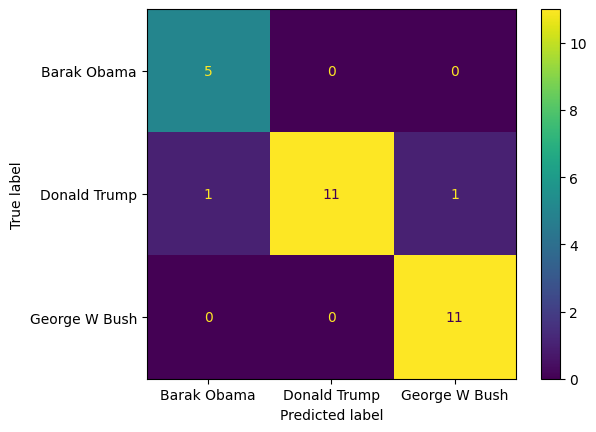

In [13]:
disp=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=['Barak Obama','Donald Trump','George W Bush'])
disp.plot()

In [14]:
import joblib

joblib.dump(model,'SVM-Face Recognition.sav')

['SVM-Face Recognition.sav']